In [9]:
#import
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#create information data
data = np.array([1, 0, 0, 1,1,1, 0,1,1,1,0,0,0])

bit_duration = 1
freq = 1/bit_duration  # carrier frequency

samples_per_bit = 200   
n_samples = data.size * samples_per_bit # total samples

time = np.linspace(0, data.size, n_samples) # create time domain

A = 1000; #amplitude carrier signal


In [11]:
#binary seq
bnr_seq = np.repeat(data, samples_per_bit)
# carry signal
carrier_signal_1 = A*np.cos(2*np.pi * freq * time)
carrier_signal_2 = A*np.cos(2*np.pi * freq * time + np.pi)

#psk modulation
# phase = np.pi*bnr_seq + np.pi # +180degree if 0 else +360deg
# psk = A*np.cos(2*np.pi * freq * time + phase)
psk = []
for i in range (0,time.size):
    if bnr_seq[i] == 0:
       psk.append(carrier_signal_2[i])
    else:
       psk.append(carrier_signal_1[i])
    

#noise 

N0 = 2  #variance
mul = 10  # noise's magnitude
noise = mul * np.sqrt(N0/2) * np.random.randn(n_samples) 
#r: psk with noise
r = psk + noise

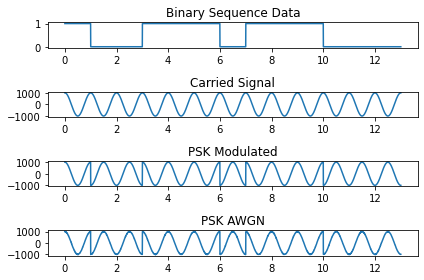

In [12]:
#plot 
plt.subplot(4, 1, 1)
plt.plot(time, bnr_seq)
plt.title("Binary Sequence Data")
# plt.savefig('./pic/data.jpg')
# plt.show()

plt.subplot(4, 1, 2)
plt.plot(time, carrier_signal_1)
plt.title("Carried Signal")
# plt.savefig('./pic/carrier_signal.jpg')
# plt.show()


plt.subplot(4, 1, 3)
plt.plot(time, psk)
plt.title("PSK Modulated")
# plt.savefig('./pic/psk_signal.jpg')

# plt.show()

plt.subplot(4, 1, 4)
plt.plot(time, r)
plt.title("PSK AWGN")
plt.savefig('./pic/psk_AWGN.jpg')

plt.tight_layout()
plt.savefig('./pic/signal.jpg')

plt.show()

In [13]:
def ML_criterion(received_signal, carrier, i):
    decision_variable = np.sum(received_signal[i*samples_per_bit : (i+1)*samples_per_bit] * carrier[i*samples_per_bit : (i+1)*samples_per_bit])
    energy = np.sum(carrier[i*samples_per_bit : (i+1)*samples_per_bit]*carrier[i*samples_per_bit : (i+1)*samples_per_bit])
    sr = decision_variable - energy/2
    return sr

In [14]:
def PSKdemod(received_signal):
    bitstream =[]
    i = 0
    for i in range(0 ,len(data)):
        if (ML_criterion(received_signal, carrier_signal_1, i) > ML_criterion(received_signal, carrier_signal_2, i)):
            bitstream.append(1)
        else: 
            bitstream.append(0)
    return bitstream

In [15]:
#demodulate without noise
demodulated_data = np.asarray(PSKdemod(psk))
print(data)
print(demodulated_data)
print("demodulate without noise")
error = np.sum(np.abs(data - demodulated_data)) / data.size
print("error: %5.2f%%" % (error*100))

[1 0 0 1 1 1 0 1 1 1 0 0 0]
[1 0 0 1 1 1 0 1 1 1 0 0 0]
demodulate without noise
error:  0.00%


In [16]:
#demodulate with noise
demodulated_data = np.asarray(PSKdemod(r))
print(data)
print(demodulated_data)
print("demodulate with noise")
error = np.sum(np.abs(data - demodulated_data)) / data.size
print("error: %5.2f%%" % (error*100))
print(mul)

[1 0 0 1 1 1 0 1 1 1 0 0 0]
[1 0 0 1 1 1 0 1 1 1 0 0 0]
demodulate with noise
error:  0.00%
10


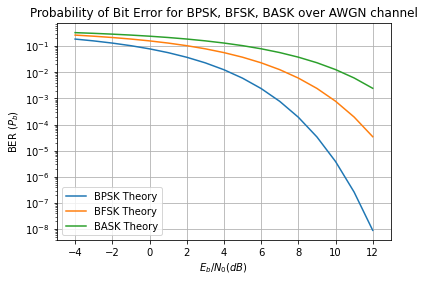

In [30]:
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 1) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
#------------ Transmitter---------------
Pe_bpsk = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
Pe_bfsk = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)/2))
Pe_bask = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)/4))


fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,Pe_bpsk,marker='',linestyle='-',label='BPSK Theory')
ax.semilogy(EbN0dBs,Pe_bfsk,marker='',linestyle='-',label='BFSK Theory')
ax.semilogy(EbN0dBs,Pe_bask,marker='',linestyle='-',label='BASK Theory')

ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK, BFSK, BASK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();
plt.savefig('./pic/ber.jpg')

plt.show()